<a href="https://colab.research.google.com/github/inderpreetsingh01/PyMath/blob/main/Python4DA_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# efficiency on large arrays of data
# NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects.
# NumPy's library of algorithms written in the C language can operate on this memory without any type checking or other overhead.
# NumPy arrays also use much less memory than built-in Python sequences.

# NumPy operations perform complex computations on entire arrays without the need for Python for loops,
# which can be slow for large sequences. NumPy is faster than regular Python code because its C-based algorithms avoid overhead present
# with regular interpreted Python code.

In [3]:
import numpy as np
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

In [4]:
%timeit my_arr2 = my_arr * 2

1.04 ms ± 89.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%timeit my_list2 = [x * 2 for x in my_list]

45.9 ms ± 741 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

In [7]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [8]:
data.shape

(2, 3)

In [9]:
data.dtype

dtype('float64')

In [12]:
data.ndim

2

In [13]:
int_arr = data.astype(np.int32)

In [14]:
int_arr

array([[ 1,  0,  3],
       [ 0, -3,  6]], dtype=int32)

In [16]:
numeric_strings = np.array(["1.25", "-9.6", "42"])

In [17]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [18]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Arithmetic with NumPy Arrays

In [ ]:
# Arrays are important because they enable you to express batch operations on data without writing any for loops.
# NumPy users call this vectorization. Any arithmetic operations between equal-size arrays apply the operation element-wise:

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [20]:
arr-arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [21]:
arr**2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [22]:
arr*2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [23]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [24]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [26]:
arr2>arr

array([[False,  True, False],
       [ True, False,  True]])

## Slicing

In [ ]:
# slices are views
# to copy arr[5:8].copy()

# An important first distinction from Python's built-in lists is that array slices are views on the original array.
# This means that the data is not copied, and any modifications to the view will be reflected in the source array.
# As NumPy has been designed to be able to work with very large arrays, you could imagine performance and memory problems
# if NumPy insisted on always copying data.
# If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[5:8].copy().
# As you will see, pandas works this way, too.

In [27]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
arr[5:8] = 12

In [29]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [30]:
arr2[0][1]

np.float64(4.0)

In [31]:
arr2[0, 1]

np.float64(4.0)

In [32]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [36]:
arr3d[:1, 1:]

array([[[4, 5, 6]]])

In [35]:
# slicing preserves dimension
# array with same number of dimensions
# When slicing like this, you always obtain array views of the same number of dimensions.
arr3d[:1, 1:].shape

(1, 1, 3)

In [37]:
# indexing reduces dimension
arr3d[0, 1:]

array([[4, 5, 6]])

In [38]:
arr3d[0, 1:].shape

(1, 3)

## Boolean Indexing

In [ ]:
# boolean indexing creates a copy, & and | for boolean

In [39]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

In [40]:
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])

In [41]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [42]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [43]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [44]:
data[names == "Bob", 1]

array([7, 0])

In [45]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [46]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [47]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [49]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [52]:
mask = (names == "Bob") | (names == "Will")
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [ ]:
# The Python keywords and and or do not work with Boolean arrays. Use & (and) and | (or) instead.
# Selecting data from an array by Boolean indexing and assigning the result to a new variable always creates a copy of the data, even if the returned array is unchanged.
# Selecting data from an array by Boolean indexing and assigning the result to a new variable always creates a copy of the data, even if the returned array is unchanged.

In [54]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [57]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

## Fancy Indexing

In [58]:
arr = np.zeros((8, 4))

In [59]:
for i in range(8):
  arr[i] = i

In [60]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [61]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [62]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [65]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [66]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [67]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [ ]:
# Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array when assigning the result to a new variable.

## Transposing Arrays and Swapping Axes


In [68]:
# Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything.

In [69]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [70]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [71]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [72]:
arr.T@arr

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [73]:
# swapaxes similarly returns a view on the data without making a copy.
arr.swapaxes(0, 1)

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

## Pseudorandom Number Generation

In [74]:
# refer table in book

## Universal Functions: Fast Element-Wise Array Functions

In [75]:
arr = np.arange(10)

In [76]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [77]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [ ]:
# These are referred to as unary ufuncs. Others, such as numpy.add or numpy.maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [78]:
rng = np.random.default_rng(seed=12345)
x = rng.standard_normal(8)
y = rng.standard_normal(8)

In [80]:
x

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331,
       -0.74088465, -1.3677927 ,  0.6488928 ])

In [81]:
y

array([ 0.36105811, -1.95286306,  2.34740965,  0.96849691, -0.75938718,
        0.90219827, -0.46695317, -0.06068952])

In [79]:
np.maximum(x, y)

array([ 0.36105811,  1.26372846,  2.34740965,  0.96849691, -0.07534331,
        0.90219827, -0.46695317,  0.6488928 ])

In [82]:
remainder, whole_part = np.modf(x)

In [83]:
remainder

array([-0.42382504,  0.26372846, -0.87066174, -0.25917323, -0.07534331,
       -0.74088465, -0.3677927 ,  0.6488928 ])

In [84]:
whole_part

array([-1.,  1., -0., -0., -0., -0., -1.,  0.])

## Array-Oriented Programming with Arrays

#### Expressing Conditional Logic as Array Operations

In [85]:
arr = rng.standard_normal((4, 4))

In [86]:
arr > 0

array([[ True, False,  True,  True],
       [ True, False,  True, False],
       [False,  True, False, False],
       [ True,  True,  True,  True]])

In [87]:
# condition, true, false
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [ 2, -2,  2, -2],
       [-2,  2, -2, -2],
       [ 2,  2,  2,  2]])

In [88]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -1.25666813,  2.        ,  2.        ],
       [ 2.        , -0.29969852,  2.        , -1.62158273],
       [-0.15818926,  2.        , -1.34360107, -0.08168759],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

### Mathematical and Statistical Methods

In [89]:
arr.mean()

np.float64(0.4141155487177851)

In [91]:
np.mean(arr)

np.float64(0.4141155487177851)

In [92]:
arr.sum()

np.float64(6.625848779484562)

In [93]:
arr.mean(axis=1)

array([ 0.37675318,  0.07598404, -0.2834985 ,  1.48722347])

In [94]:
arr.sum(axis=0)

array([3.67769308, 1.51127671, 0.91253713, 0.52434187])

In [95]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [96]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [97]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

### Methods for Boolean Arrays

In [98]:
(arr > 0).sum()

np.int64(8)

In [100]:
(arr<=0).sum()

np.int64(1)

In [101]:
bools = np.array([False, False, True, False])

In [102]:
bools.any()

np.True_

In [103]:
bools.all()

np.False_

### Sorting

In [105]:
arr = rng.standard_normal(6)
arr

array([-1.22867499,  0.25755777,  0.31290292, -0.13081169,  1.26998312,
       -0.09296246])

In [106]:
arr.sort()

In [107]:
arr

array([-1.22867499, -0.13081169, -0.09296246,  0.25755777,  0.31290292,
        1.26998312])

In [108]:
arr = rng.standard_normal((5, 3))
arr

array([[-0.06615089, -1.10821447,  0.13595685],
       [ 1.34707776,  0.06114402,  0.0709146 ],
       [ 0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746],
       [ 0.30003095, -1.60270159,  0.26679883]])

In [109]:
arr.sort(axis=0)

In [110]:
arr

array([[-0.06615089, -1.60270159, -0.79501746],
       [ 0.30003095, -1.10821447,  0.0709146 ],
       [ 0.43365454,  0.06114402,  0.13595685],
       [ 0.53672097,  0.27748366,  0.26679883],
       [ 1.34707776,  0.61835001,  0.53025239]])

### Unique and Other Set Logic

In [111]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [115]:
sorted(set(names))

[np.str_('Bob'), np.str_('Joe'), np.str_('Will')]

In [112]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [114]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.isin(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## Linear Algebra

In [117]:
 from numpy.linalg import inv, qr
 X = rng.standard_normal((5, 5))
 mat = X.T @ X
 mat

array([[ 1.59112385,  0.29384438,  0.26968734, -0.37550785,  0.60221733],
       [ 0.29384438,  3.5106851 ,  0.68829016, -1.46782786, -0.687138  ],
       [ 0.26968734,  0.68829016,  5.47841372, -0.48645855, -2.11808533],
       [-0.37550785, -1.46782786, -0.48645855,  3.68839637,  2.60082303],
       [ 0.60221733, -0.687138  , -2.11808533,  2.60082303,  3.71055118]])

In [118]:
inv(mat)

array([[ 1.19032547,  0.1091235 , -0.35556543,  0.75691317, -0.90648712],
       [ 0.1091235 ,  0.38308342, -0.11487405,  0.31065365, -0.23008794],
       [-0.35556543, -0.11487405,  0.39207717, -0.4225613 ,  0.55642769],
       [ 0.75691317,  0.31065365, -0.4225613 ,  1.25006101, -1.18272797],
       [-0.90648712, -0.23008794,  0.55642769, -1.18272797,  1.52064404]])

In [119]:
mat @ inv(mat)

array([[ 1.00000000e+00, -2.29670875e-17,  4.41072131e-17,
         1.58193984e-16, -1.25016353e-16],
       [ 1.87112365e-17,  1.00000000e+00,  7.49410239e-17,
         3.52070410e-16, -3.84338943e-16],
       [-2.88918472e-16, -9.85611475e-17,  1.00000000e+00,
        -2.26871591e-17, -7.71565058e-16],
       [ 3.00764818e-16,  1.24757285e-17,  1.06268183e-16,
         1.00000000e+00, -9.28851163e-17],
       [ 2.97845142e-16, -1.81528639e-17,  1.46998290e-16,
        -7.76655509e-16,  1.00000000e+00]])

### Example: Random Walks

In [120]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

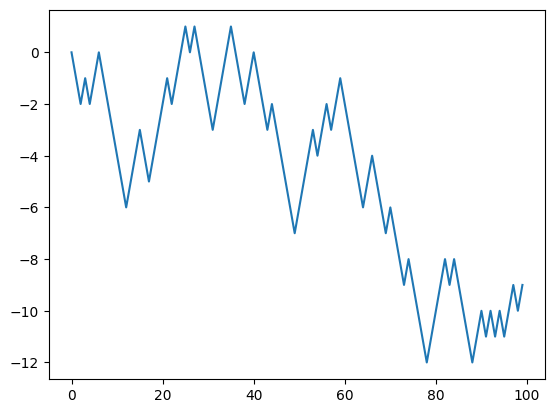

In [121]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])

In [122]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [124]:
walk.min()

np.int64(-8)

In [125]:
walk.max()

np.int64(50)

In [129]:
np.random.randint(0, 2, 10)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [138]:
np.random.seed(0)
np.random.randint(0, 2, 10)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [139]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

### Simulating Many Random Walks at Once


In [140]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)

In [141]:
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [142]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [143]:
hits30

array([False,  True,  True, ...,  True, False,  True])

In [144]:
hits30.sum()

np.int64(3395)

In [145]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

In [146]:
crossing_times.mean()

np.float64(500.5699558173785)